In [65]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib


In [33]:
# Load Datasets from Cache
train_inputs = pd.read_csv('../cache/train_inputs.csv')
val_inputs = pd.read_csv('../cache/val_inputs.csv')
train_targets = pd.read_csv('../cache/train_targets.csv')
val_targets = pd.read_csv('../cache/val_targets.csv')

In [34]:
train_inputs = train_inputs.drop(columns=['Date'])
val_inputs = val_inputs.drop(columns=['Date'])

**TRYING DECISION TREE**

In [20]:
# Initialize the Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)
print("Decision Tree model initialized.")

Decision Tree model initialized.


In [21]:
# Train the model
print("Training the Decision Tree model...")
tree.fit(train_inputs, train_targets)
print("Model training complete.")

Training the Decision Tree model...
Model training complete.


In [22]:
# Train the model
print("Training the Decision Tree model...")
tree.fit(train_inputs, train_targets)
print("Model training complete.")

Training the Decision Tree model...
Model training complete.


In [24]:
# Evaluate the model on training data
print("Evaluating on training data...")
tree_train_preds = tree.predict(train_inputs)
tree_train_rmse = root_mean_squared_error(train_targets, tree_train_preds)
print(f"Training RMSE: {tree_train_rmse}")

Evaluating on training data...
Training RMSE: 2.0564761828351167e-17


In [35]:
# Evaluate the model on validation data
print("Evaluating on validation data...")
tree_val_preds = tree.predict(val_inputs)
tree_val_rmse = root_mean_squared_error(val_targets, tree_val_preds)
print(f"Validation RMSE: {tree_val_rmse}")

Evaluating on validation data...
Validation RMSE: 5355.69031285767


Visualizing the Decision Tree...


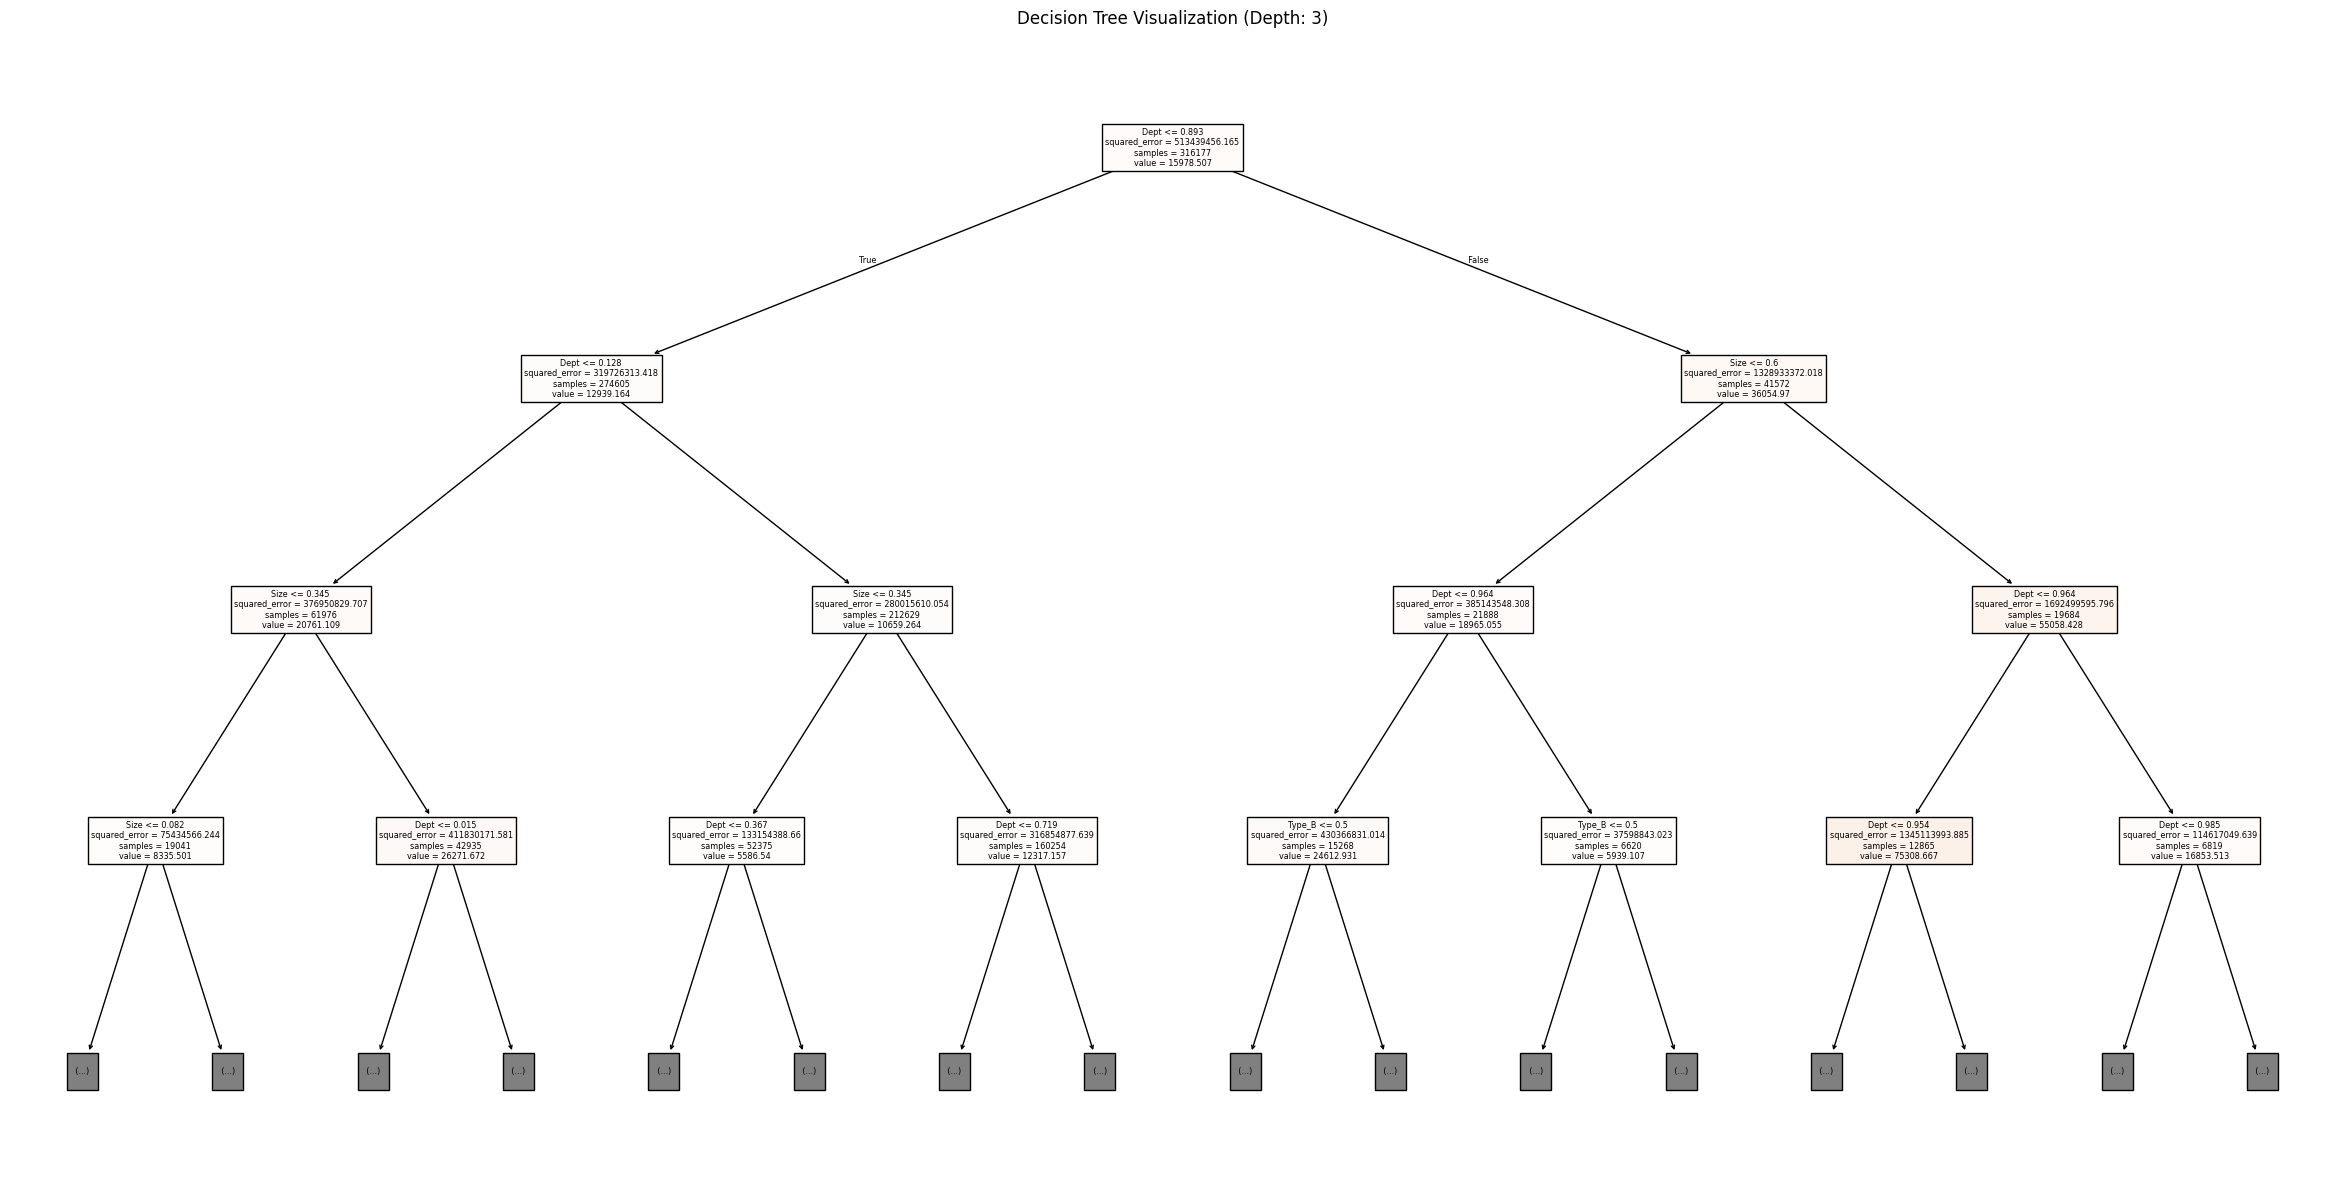

In [36]:
# Visualize the Decision Tree
print("Visualizing the Decision Tree...")
plt.figure(figsize=(30, 15))
plot_tree(tree, feature_names=train_inputs.columns, max_depth=3, filled=True)
plt.title("Decision Tree Visualization (Depth: 3)")
plt.show()

In [39]:
# Export the Decision Tree rules
tree_text = export_text(tree, feature_names=list(train_inputs.columns))
print("Sample Tree Rules (First 2000 Characters):")
print(tree_text[:2000])

Sample Tree Rules (First 2000 Characters):
|--- Dept <= 0.89
|   |--- Dept <= 0.13
|   |   |--- Size <= 0.35
|   |   |   |--- Size <= 0.08
|   |   |   |   |--- Dept <= 0.02
|   |   |   |   |   |--- Dept <= 0.01
|   |   |   |   |   |   |--- Type_A <= 0.50
|   |   |   |   |   |   |   |--- Temperature <= 0.77
|   |   |   |   |   |   |   |   |--- Unemployment <= 0.62
|   |   |   |   |   |   |   |   |   |--- MarkDown2 <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- MarkDown5 <= 0.01
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- MarkDown5 >  0.01
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 20
|   |   |   |   |   |   |   |   |   |--- MarkDown2 >  0.00
|   |   |   |   |   |   |   |   |   |   |--- Year <= 0.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |   |--- Year >  0.75
|   |   |   |   |   |   |   |   |   |   

In [40]:
# Feature Importance
print("Analyzing feature importance...")
tree_importances = tree.feature_importances_
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

Analyzing feature importance...


In [41]:
# Print top 10 important features
print("Top 10 important features:")
print(tree_importance_df.head(10))

Top 10 important features:
         feature  importance
1           Dept    0.636657
3           Size    0.175419
0          Store    0.049751
15          Week    0.046615
11           CPI    0.025874
17        Type_B    0.010781
12  Unemployment    0.008598
4    Temperature    0.007544
10     MarkDown5    0.007152
6      MarkDown1    0.007043


Visualizing feature importance...


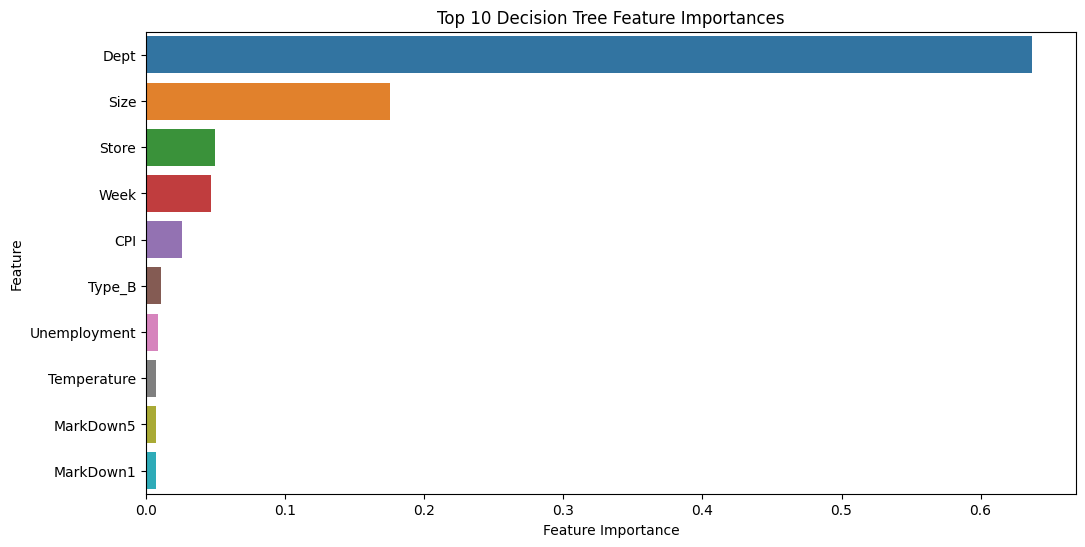

In [45]:
# Visualize Feature Importance
print("Visualizing feature importance...")
plt.figure(figsize=(12, 6))
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature',hue='feature')
plt.title("Top 10 Decision Tree Feature Importances")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

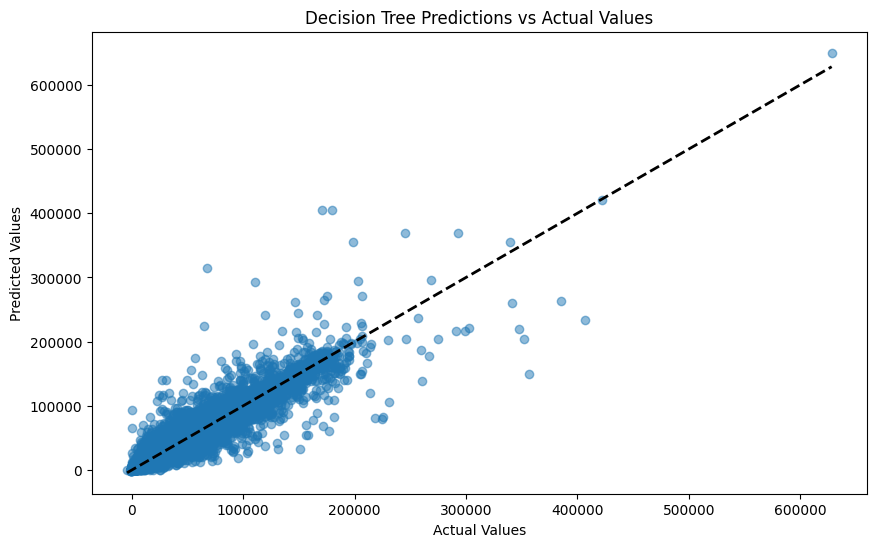

In [48]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(val_targets, tree_val_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Predictions vs Actual Values')
plt.plot([val_targets.min(), val_targets.max()], [val_targets.min(), val_targets.max()], 'k--', lw=2)
plt.show()

In [66]:
# Save trained Decison tree for Validation
joblib.dump(tree, '../cache/decision_tree_model.joblib')
print("Decision Tree model saved.")

Decision Tree model saved.


**TRYING RANDOM FOREST REGRESSOR**

In [49]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
print("Random Forest model initialized with 100 trees and no depth limit.")

Random Forest model initialized with 100 trees and no depth limit.


In [50]:
# Train the model
print("Training the Random Forest model...")
rf.fit(train_inputs, train_targets)
print("Model training complete.")

Training the Random Forest model...


/Users/admukhop/Documents/My Folder/IISC/AUG-DEC Sem/project/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model training complete.


In [51]:
# Evaluate the model on training data
print("Evaluating on training data...")
rf_train_preds = rf.predict(train_inputs)
rf_train_rmse = root_mean_squared_error(train_targets, rf_train_preds)
print(f"Training RMSE: {rf_train_rmse}")

Evaluating on training data...
Training RMSE: 1419.33882522359


In [52]:
# Evaluate the model on validation data
print("Evaluating on validation data...")
rf_val_preds = rf.predict(val_inputs)
rf_val_rmse = root_mean_squared_error(val_targets, rf_val_preds)
print(f"Validation RMSE: {rf_val_rmse}")


Evaluating on validation data...
Validation RMSE: 3879.909706815994


In [53]:
# Feature Importance
print("Analyzing feature importance...")
rf_importances = rf.feature_importances_
rf_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf_importances
}).sort_values('importance', ascending=False)

Analyzing feature importance...


In [54]:
# Print top 10 important features
print("Top 10 important features:")
print(rf_importance_df.head(10))

Top 10 important features:
         feature  importance
1           Dept    0.631774
3           Size    0.179972
0          Store    0.049376
15          Week    0.037463
11           CPI    0.024228
17        Type_B    0.010286
4    Temperature    0.009589
12  Unemployment    0.009244
8      MarkDown3    0.008671
6      MarkDown1    0.006971


Visualizing feature importance...


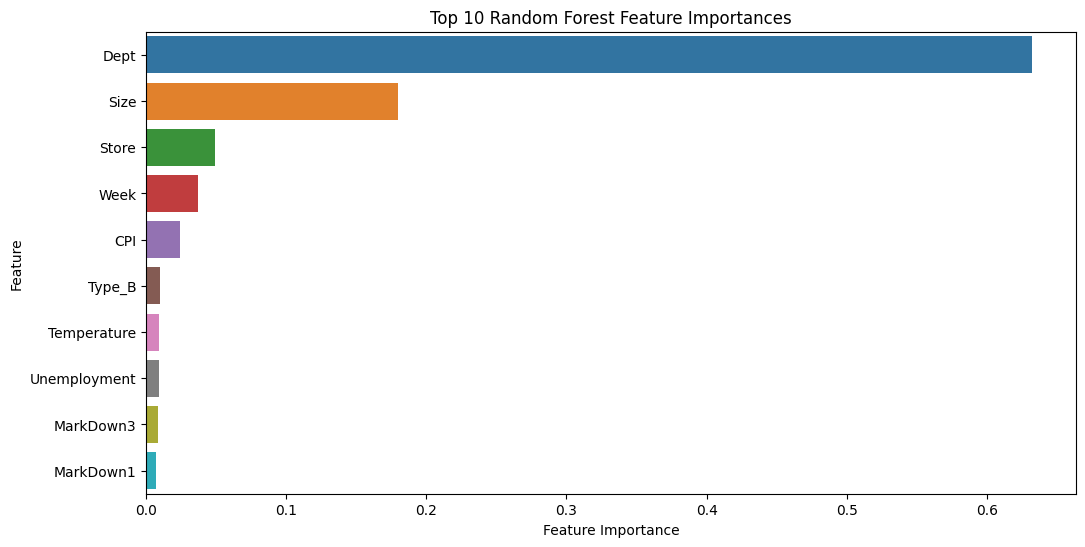

In [57]:
# Visualize Feature Importance
print("Visualizing feature importance...")
plt.figure(figsize=(12, 6))
sns.barplot(data=rf_importance_df.head(10), x='importance', y='feature', hue='feature')
plt.title("Top 10 Random Forest Feature Importances")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [62]:
# Ensure val_targets and rf_val_preds are 1-dimensional
val_targets = val_targets.values.flatten() if isinstance(val_targets, pd.DataFrame) else val_targets.flatten()
rf_val_preds = rf_val_preds.flatten()

Visualizing predictions vs actual values...


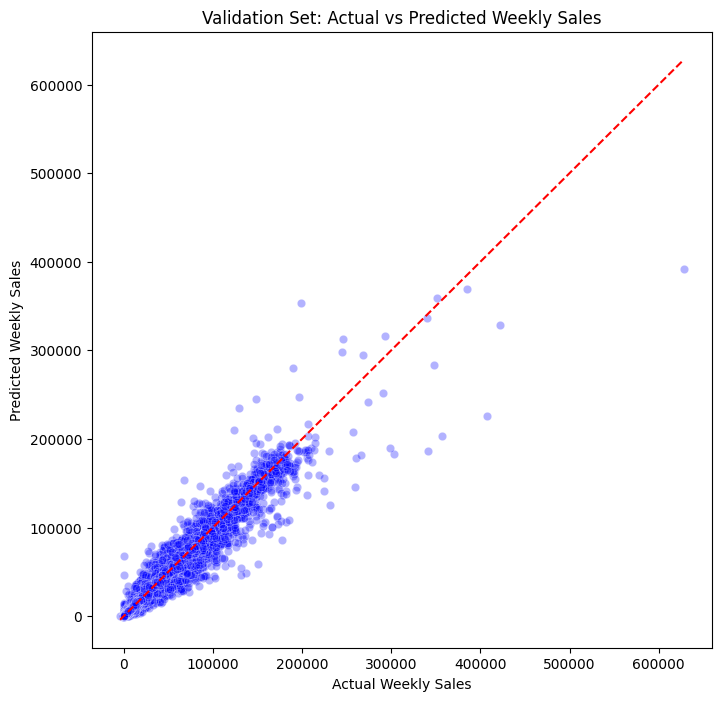

In [63]:
# Validation Scatter Plot
print("Visualizing predictions vs actual values...")
plt.figure(figsize=(8, 8))
sns.scatterplot(x=val_targets, y=rf_val_preds, alpha=0.3, color='blue')
plt.plot([val_targets.min(), val_targets.max()], [val_targets.min(), val_targets.max()], color='red', linestyle='--')
plt.title("Validation Set: Actual vs Predicted Weekly Sales")
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.show()


In [68]:
# Save Random Forest Model for Validation
joblib.dump(rf, '../cache/random_forest_model.joblib')
print("Random Forest model saved.")

Random Forest model saved.


**HERE ARE SOME ADDITIONAL MODELS TRIED**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout

# Define the LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Dropout layer
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Display the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10, 100)        │        46,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,501 (302.74 KB)

 Trainable params: 77,501 (302.74 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  
    epochs=10,             
    batch_size=32,         
    verbose=1
)

# Save the trained model
model.save('sales_forecasting_lstm.h5')


Epoch 1/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 50s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 5/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 6/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 8/10
8432/8432 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 9/10
8432/8432 ━━━━━━━━━━━

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0011 - mse: 0.0011
Test Loss: 0.0010673202341422439, Test MSE: 0.0010673202341422439
2635/2635 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


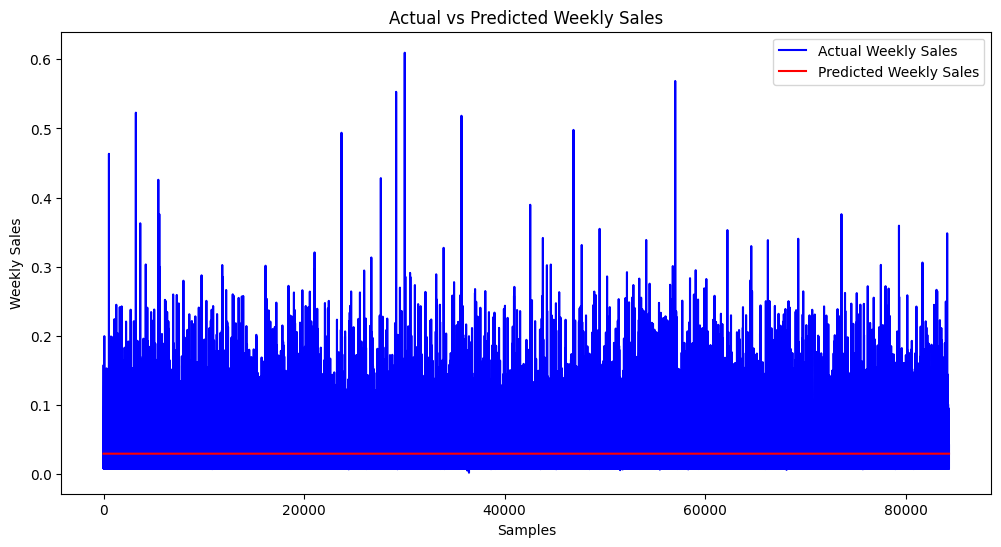

In [ ]:
# Evaluate on the test set
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test MSE: {test_mse}")

# Predict on the test set
y_pred = model.predict(X_test)

# Rescale the predictions back to the original scale
y_pred_rescaled = scaler_target.inverse_transform(y_pred)
y_test_rescaled = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Display predictions vs actual values
import matplotlib.pyplot as plt

